In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import acquire
import prepare

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Titanic

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
titanic_train, titanic_validate, titanic_test = prepare.train_validate_test_split(prepare.prep_titanic(acquire.get_titanic_data()), 'survived')

What is your baseline prediction? 

In [3]:
#titanic_train.survived.value_counts()

In [4]:
#titanic_train['baseline_prediction'] = titanic_train.survived.value_counts().idxmax()

#baseline_accuracy = metrics.accuracy_score(y_true=titanic_train.survived, y_pred=titanic_train.baseline_prediction)

#print(f'Baseline accuracy: {baseline_accuracy:%}')

In [5]:
titanic_train.head()

,survived,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
301,1,male,2,0,23.2500,Third,Queenstown,0,1,0,1,1,0
290,1,female,0,0,78.8500,First,Southampton,1,0,0,0,0,1
779,1,female,0,1,211.3375,First,Southampton,0,0,0,0,0,1
356,1,female,0,1,55.0000,First,Southampton,0,0,0,0,0,1
147,0,female,2,2,34.3750,Third,Southampton,0,0,0,1,0,1


What is your baseline accuracy? *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*

In [6]:
titanic_train.head()

,survived,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
301,1,male,2,0,23.2500,Third,Queenstown,0,1,0,1,1,0
290,1,female,0,0,78.8500,First,Southampton,1,0,0,0,0,1
779,1,female,0,1,211.3375,First,Southampton,0,0,0,0,0,1
356,1,female,0,1,55.0000,First,Southampton,0,0,0,0,0,1
147,0,female,2,2,34.3750,Third,Southampton,0,0,0,1,0,1


In [7]:
#functions can't take strings so i dropped all columns that are strings
drop_columns = list(titanic_train.select_dtypes(include='object').columns)

titanic_train.drop(columns=drop_columns, inplace=True)

In [8]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=['survived'])
y_train = titanic_train.survived

In [9]:

#figure out the mode of values in our target variable
titanic_train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [10]:
#baseline is 0 so then see where y_train is equal to 0 and then the mean of that
baseline_acc = (y_train == 0).mean()

print(f'Baseline accuracy: {baseline_acc:.2%}')

Baseline accuracy: 61.65%


In [11]:
#create my tree with no depth constraints
tree = DecisionTreeClassifier(max_depth = 3) # my algorithm

#fit my tree
tree = tree.fit(X_train, y_train) #my model

In [12]:
#model score
tree.score(X_train, y_train)

0.8052208835341366

In [13]:
# make prediction on train obeservations
y_pred = tree.predict(X_train)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [14]:
#confusion matrix
metrics.confusion_matrix(y_train, y_pred)

array([[268,  39],
       [ 58, 133]])

In [15]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,268,39
1,58,133


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


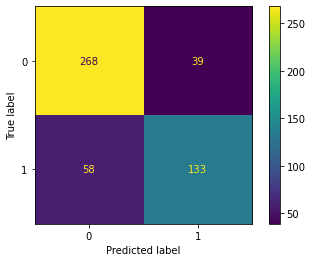

In [16]:
metrics.plot_confusion_matrix(tree, X_train, y_train, display_labels=[0, 1])

In [17]:
#classification report
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       307
           1       0.77      0.70      0.73       191

    accuracy                           0.81       498
   macro avg       0.80      0.78      0.79       498
weighted avg       0.80      0.81      0.80       498



In [18]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

In [19]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8052208835341366 

True Positive Rate/Sensitivity/Recall/Power: 0.6963350785340314 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1270358306188925 

True Negative Rate/Specificity/Selectivity: 0.8729641693811075 

False Negative Rate/Miss Rate: 0.3036649214659686 

Precision/PPV: 0.7732558139534884 

F1 Score: 0.7327823691460056 

Support (0): 307 

Support (1): 191


### Find Optimal max_depth

In [20]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = metrics.classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.813505    0.711230    0.7751    0.762367      0.774279
recall       0.824104    0.696335    0.7751    0.760220      0.775100
f1-score     0.818770    0.703704    0.7751    0.761237      0.774638
support    307.000000  191.000000    0.7751  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.750623    0.938144  0.787149    0.844384      0.822544
recall       0.980456    0.476440  0.787149    0.728448      0.787149
f1-score     0.850282    0.631944  0.787149    0.741113      0.766542
support    307.000000  191.000000  0.787149  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.822086    0.773256  0.805221    0.797671      0.803358
recall       0.872964    0.696335  0.805221    0.784650      0.805221
f1-score     

In [21]:
drop_columns = list(titanic_validate.select_dtypes(include='object').columns)

titanic_validate.drop(columns=drop_columns, inplace=True)

In [22]:
X_validate = titanic_validate.drop(columns=['survived'])
y_validate = titanic_validate.survived

In [23]:
val_pred = tree.predict(X_validate)

In [24]:
#model accuracy score
tree.score(X_validate, y_validate)

0.7990654205607477

In [25]:
#confusion matrix
metrics.confusion_matrix(y_validate, val_pred)

array([[117,  15],
       [ 28,  54]])

In [26]:
print(metrics.classification_report(y_validate, val_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       132
           1       0.78      0.66      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80      0.80      0.80       214



In [29]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metric = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metric.append(output)
    
df = pd.DataFrame(metric)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.775100,0.808411,-0.033311
1,2,0.787149,0.780374,0.006775
2,3,0.805221,0.822430,-0.017209
3,4,0.819277,0.808411,0.010866
4,5,0.835341,0.808411,0.026930
5,6,0.861446,0.799065,0.062380
6,7,0.889558,0.817757,0.071801
7,8,0.901606,0.808411,0.093195
8,9,0.917671,0.813084,0.104587
9,10,0.925703,0.799065,0.126637


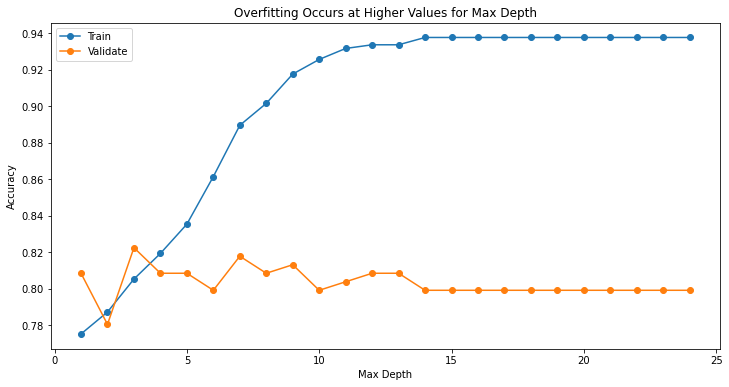

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.805221,0.822430,-0.017209
6,7,0.889558,0.817757,0.071801
0,1,0.775100,0.808411,-0.033311
3,4,0.819277,0.808411,0.010866
4,5,0.835341,0.808411,0.026930
7,8,0.901606,0.808411,0.093195
5,6,0.861446,0.799065,0.062380
1,2,0.787149,0.780374,0.006775


## Telco

In [50]:
telco_train, telco_validate, telco_test = prepare.train_validate_test_split(prepare.prep_telco(acquire.get_telco_data()), 'churn')

In [51]:
telco_train.churn_Yes.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [52]:
#baseline is 0 so then see where y_train is equal to 0 and then the mean of that
baseline_acc = (y_train == 0).mean()

print(f'Baseline accuracy: {baseline_acc:.2%}')

Baseline accuracy: 73.43%


In [53]:
telco_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4491,Male,0,No,No,48,Yes,No,No,Yes,Yes,...,1,0,0,0,1,0,0,1,0,0
2346,Female,0,Yes,Yes,58,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
770,Female,0,No,Yes,44,Yes,Yes,No,Yes,No,...,1,1,0,1,0,0,0,0,0,1
5155,Male,0,Yes,No,10,Yes,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
189,Female,0,No,Yes,11,No,No phone service,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1


In [54]:
drop_columns = list(telco_train.select_dtypes(include='object').columns)

telco_train.drop(columns=drop_columns, inplace=True)

In [55]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 4491 to 3781
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3937 non-null   int64  
 1   tenure                                 3937 non-null   int64  
 2   monthly_charges                        3937 non-null   float64
 3   total_charges                          3937 non-null   float64
 4   gender_Male                            3937 non-null   uint8  
 5   partner_Yes                            3937 non-null   uint8  
 6   dependents_Yes                         3937 non-null   uint8  
 7   phone_service_Yes                      3937 non-null   uint8  
 8   multiple_lines_No phone service        3937 non-null   uint8  
 9   multiple_lines_Yes                     3937 non-null   uint8  
 10  online_security_No internet service    3937 non-null   uint8  
 11  o

In [56]:
X_train = telco_train.drop(columns=['churn_Yes'])
y_train = telco_train.churn_Yes

In [57]:
telco_tree = DecisionTreeClassifier()

telco_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred = telco_tree.predict(X_train)

In [59]:
#model score
telco_tree.score(X_train, y_train)

0.9982219964439929

In [60]:
#confusion matrix
metrics.confusion_matrix(y_train, y_pred)

array([[2891,    0],
       [   7, 1039]])

In [61]:
#classification report
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2891
           1       1.00      0.99      1.00      1046

    accuracy                           1.00      3937
   macro avg       1.00      1.00      1.00      3937
weighted avg       1.00      1.00      1.00      3937



In [62]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

In [63]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9982219964439929 

True Positive Rate/Sensitivity/Recall/Power: 0.9933078393881453 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0 

True Negative Rate/Specificity/Selectivity: 1.0 

False Negative Rate/Miss Rate: 0.006692160611854685 

Precision/PPV: 1.0 

F1 Score: 0.9966426858513189 

Support (0): 2891 

Support (1): 1046


### Find Optimal max_depth

In [64]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = metrics.classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734315     0.0  0.734315     0.367158      0.539219
recall        1.000000     0.0  0.734315     0.500000      0.734315
f1-score      0.846807     0.0  0.734315     0.423404      0.621824
support    2891.000000  1046.0  0.734315  3937.000000   3937.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.800474     0.665474  0.781306     0.732974      0.764606
recall        0.935316     0.355641  0.781306     0.645479      0.781306
f1-score      0.862658     0.463551  0.781306     0.663104      0.756621
support    2891.000000  1046.000000  0.781306  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.800474     0.665474  0.781306     0.732974      0.764606
recall        0.935316     0.355641  0.781306     0.645479      0.781306

**max_depth = 19+ is giving us the best accuracy**

In [70]:
drop_columns = list(telco_validate.select_dtypes(include='object').columns)

telco_validate.drop(columns=drop_columns, inplace=True)

In [71]:
X_validate = telco_validate.drop(columns=['churn_Yes'])
y_validate = telco_validate.churn_Yes

In [72]:
val_pred = telco_tree.predict(X_validate)

In [80]:
#model accuracy score
telco_tree.score(X_validate, y_validate)

0.7322274881516587

In [74]:
#confusion matrix
metrics.confusion_matrix(y_validate, val_pred)

array([[1008,  231],
       [ 221,  228]])

In [75]:
print(metrics.classification_report(y_validate, val_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1239
           1       0.50      0.51      0.50       449

    accuracy                           0.73      1688
   macro avg       0.66      0.66      0.66      1688
weighted avg       0.73      0.73      0.73      1688



In [76]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metric = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metric.append(output)
    
df = pd.DataFrame(metric)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.781306,0.795024,-0.013718
2,3,0.781306,0.795024,-0.013718
3,4,0.784862,0.799763,-0.014901
4,5,0.792990,0.808057,-0.015067
5,6,0.805944,0.802133,0.003811
6,7,0.823470,0.789692,0.033778
7,8,0.841250,0.783175,0.058074
8,9,0.856998,0.785545,0.071453
9,10,0.882652,0.762441,0.120211


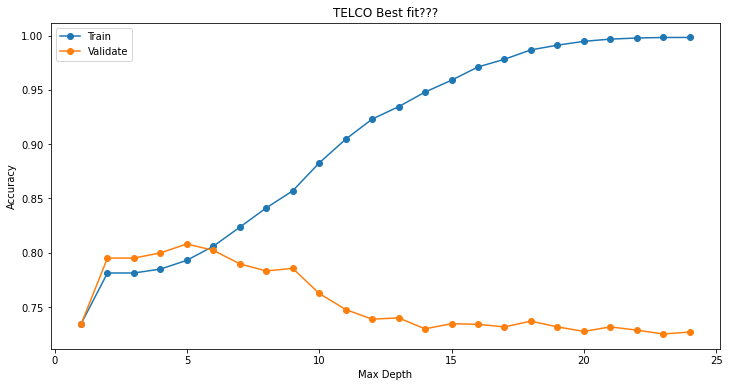

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('TELCO Best fit???')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.792990,0.808057,-0.015067
5,6,0.805944,0.802133,0.003811
3,4,0.784862,0.799763,-0.014901
1,2,0.781306,0.795024,-0.013718
2,3,0.781306,0.795024,-0.013718
6,7,0.823470,0.789692,0.033778
8,9,0.856998,0.785545,0.071453
7,8,0.841250,0.783175,0.058074
0,1,0.734315,0.734005,0.000311


## Random Forest
Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import acquire
import prepare

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
titanic_train, titanic_validate, titanic_test = prepare.train_validate_test_split(prepare.prep_titanic(acquire.get_titanic_data()),'survived')
                                                                                  
titanic_train.shape, titanic_validate.shape, titanic_test.shape  

((667, 13), (134, 13), (90, 13))

In [30]:
#functions can't take strings so i dropped all columns that are strings
drop_columns = list(titanic_train.select_dtypes(include='object').columns) + ['survived']

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=drop_columns)
y_train = titanic_train.survived

X_validate = titanic_validate.drop(columns=drop_columns)
y_validate = titanic_validate.survived



In [4]:
rf = RandomForestClassifier(max_depth=10, random_state=27, min_samples_leaf=1)

In [5]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=27)

In [6]:
rf.score(X_train, y_train)

0.9235382308845578

In [7]:
print(rf.feature_importances_)

[0.057947   0.06141855 0.41310505 0.02340069 0.29317608 0.0217894
 0.07992241 0.01518992 0.03405091]


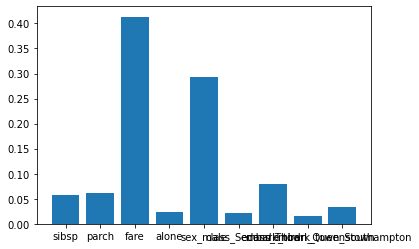

In [8]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [9]:
y_pred = rf.predict(X_train)

In [10]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.92


In [11]:
cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

[[400  11]
 [ 40 216]]


In [12]:
#classification report
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       411
           1       0.95      0.84      0.89       256

    accuracy                           0.92       667
   macro avg       0.93      0.91      0.92       667
weighted avg       0.93      0.92      0.92       667



In [13]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

In [14]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9235382308845578 

True Positive Rate/Sensitivity/Recall/Power: 0.84375 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0267639902676399 

True Negative Rate/Specificity/Selectivity: 0.9732360097323601 

False Negative Rate/Miss Rate: 0.15625 

Precision/PPV: 0.9515418502202643 

F1 Score: 0.8944099378881988 

Support (0): 411 

Support (1): 256


In [15]:
p=20
for i in range(1,21):
    # Make the model
    tree = RandomForestClassifier(max_depth=p, min_samples_leaf=i)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = metrics.classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {p} and min_samples_leaf {i}")
    print(pd.DataFrame(report),'\n')
    p-=1

Tree with max depth of 20 and min_samples_leaf 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.942308    0.924303  0.935532    0.933305      0.935397
recall       0.953771    0.906250  0.935532    0.930011      0.935532
f1-score     0.948005    0.915187  0.935532    0.931596      0.935409
support    411.000000  256.000000  0.935532  667.000000    667.000000 

Tree with max depth of 19 and min_samples_leaf 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.888372    0.877637  0.884558    0.883005      0.884252
recall       0.929440    0.812500  0.884558    0.870970      0.884558
f1-score     0.908442    0.843813  0.884558    0.876128      0.883637
support    411.000000  256.000000  0.884558  667.000000    667.000000 

Tree with max depth of 18 and min_samples_leaf 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.865169    0.882883  0.871064    0.874026      0.871967
recall   

**Looks like max_depth=20 and min_samples_leaf=1 is the best**

In [24]:
metric=[]
for h in range(5,11):
    for i in range(11, 5, -1):
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    # Fit the model (on train and only train)
        random_forest.fit(X_train, y_train)
         # Use the model
    # We’ll evaluate the model’s performance on train, first
        in_sample_accuracy = random_forest.score(X_train, y_train)
        output = {
        "max_depth": h,
        'min_samples_leaf': i,
        'train_accuracy': in_sample_accuracy,
    }
        metric.append(output)
        df = pd.DataFrame(metrics)
df

,max_depth,min_samples_leaf,train_accuracy
0,5,11,0.820090
1,5,10,0.823088
2,5,9,0.829085
3,5,8,0.827586
4,5,7,0.833583
5,5,6,0.835082
6,6,11,0.824588
7,6,10,0.826087
8,6,9,0.833583
9,6,8,0.838081


In [25]:
df[df.train_accuracy.sort_values(ascending = False)==df.train_accuracy.max()]

,max_depth,min_samples_leaf,train_accuracy
35,10,6,0.851574


## KNN

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your results using the model score, confusion matrix, and classification report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import acquire
import prepare

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier

In [2]:
titanic_train, titanic_validate, titanic_test = prepare.train_validate_test_split(prepare.prep_titanic(acquire.get_titanic_data()),'survived')
                                                                                  
titanic_train.shape, titanic_validate.shape, titanic_test.shape  

((667, 13), (134, 13), (90, 13))

In [3]:
#functions can't take strings so i dropped all columns that are strings
drop_columns = list(titanic_train.select_dtypes(include='object').columns) + ['survived']

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=drop_columns)
y_train = titanic_train.survived

X_validate = titanic_validate.drop(columns=drop_columns)
y_validate = titanic_validate.survived



In [4]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [6]:
y_pred = knn.predict(X_train)

In [7]:
#model score
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.84


In [8]:
#confusion matrix
print(metrics.confusion_matrix(y_train, y_pred))

[[406   5]
 [100 156]]


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [9]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8425787106446777 

True Positive Rate/Sensitivity/Recall/Power: 0.609375 

False Positive Rate/False Alarm Ratio/Fall-out: 0.012165450121654502 

True Negative Rate/Specificity/Selectivity: 0.9878345498783455 

False Negative Rate/Miss Rate: 0.390625 

Precision/PPV: 0.968944099378882 

F1 Score: 0.7482014388489209 

Support (0): 411 

Support (1): 256


### Set k = 10

In [10]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
y_pred = knn.predict(X_train)

In [15]:
#model score
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.78


In [16]:
#confusion matrix
print(metrics.confusion_matrix(y_train, y_pred))

[[369  42]
 [103 153]]


In [17]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.782608695652174 

True Positive Rate/Sensitivity/Recall/Power: 0.59765625 

False Positive Rate/False Alarm Ratio/Fall-out: 0.10218978102189781 

True Negative Rate/Specificity/Selectivity: 0.8978102189781022 

False Negative Rate/Miss Rate: 0.40234375 

Precision/PPV: 0.7846153846153846 

F1 Score: 0.6784922394678493 

Support (0): 411 

Support (1): 256


### Set k = 20

In [24]:
knn = KNeighborsClassifier(n_neighbors = 20)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [26]:
y_pred = knn.predict(X_train)

In [13]:
#model score
print(f'Accuracy of KNN classifier on training set: {knn.score(X_train, y_train):.2}')

Accuracy of KNN classifier on training set: 0.76


In [28]:
#confusion matrix
print(metrics.confusion_matrix(y_train, y_pred))

[[358  53]
 [111 145]]


In [29]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7541229385307346 

True Positive Rate/Sensitivity/Recall/Power: 0.56640625 

False Positive Rate/False Alarm Ratio/Fall-out: 0.12895377128953772 

True Negative Rate/Specificity/Selectivity: 0.8710462287104623 

False Negative Rate/Miss Rate: 0.43359375 

Precision/PPV: 0.7323232323232324 

F1 Score: 0.6387665198237886 

Support (0): 411 

Support (1): 256


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
- **k = 2 is better because it only has to match with two neighbors.**

### Which model performs best on our out-of-sample data from validate?

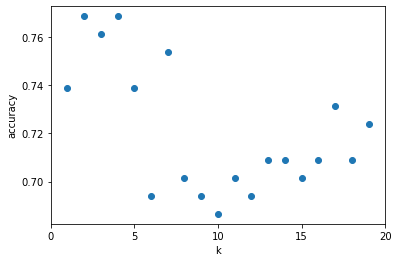

In [12]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

## Logistic Regression

Create a model that includes age in addition to fare and class. Does this model perform better than your baseline?

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

Try out other combinations of features and models.

Use you best 3 models to predict and evaluate on your validate sample.

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?